Updated with latest model, this has three main differences compared to the architectures used for m0
* 640x640 input image size (compared to 300x300)
* Focal loss (downweight well classified examples to improve class imbalance)
* FPN (Feature Pyramid Network) [extractor](https://medium.com/@jonathan_hui/what-do-we-learn-from-single-shot-object-detectors-ssd-yolo-fpn-focal-loss-3888677c5f4d) to improve small object resolution 

Model is 2x larger and inference is 10x slower than m0!

Training took ~1hour on a K80 GPU

In [1]:
cd ..

C:\Users\macle\Dropbox\mcode\SerpentAI


In [2]:
from plugins.SerpentMiniMetroGamePlugin.files.api.object_detector import ObjectDetector, draw_bounding_box
import tensorflow as tf
import skimage.io
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
%matplotlib inline

In [12]:
frozen_graph_path = "plugins/SerpentMiniMetroGamePlugin/files/ml_models/station_detector_m6-1_frozen_graph.pb"
labels_path = "plugins/SerpentMiniMetroGamePlugin/files/ml_models/station_detector_label_map.json"

In [13]:
station_detector = ObjectDetector(frozen_graph_path, labels_path)

### Running inference and plotting results on 'test' images

(by default we only show predictions with a probability > 0.2, but we can change this if required)

In [20]:
img_paths = list(Path("ml_train/station_detector/data/test").glob("*.png"))
img_filenames = [img_path.name for img_path in img_paths]

In [23]:
%%time
images = [skimage.io.imread(img_path) for img_path in img_paths]

detection_results = [station_detector.run_inference(image) for image in images] 

Wall time: 1min 3s


Note we are able to increase the positive prediction threshold to 0.75 for this model

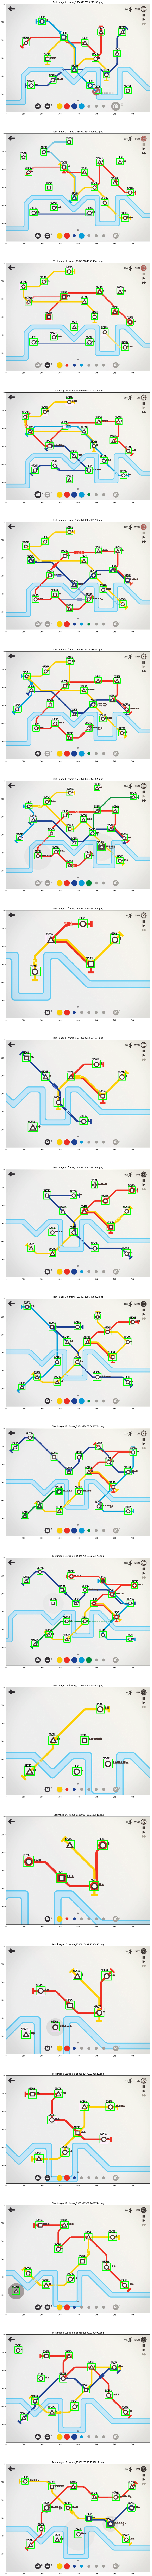

In [117]:
_, axes = plt.subplots(nrows=len(detection_results), ncols=1, figsize=(22,270))

for i, (image, img_filename, detection_result, ax) in enumerate(zip(images, img_filenames, detection_results, axes.flat)):
    image_box = station_detector.draw_bounding_boxes(image, threshold=0.75, **detection_result) 
    ax.imshow(image_box)
    ax.set_title(f"Test image {i}: {img_filename}")

Despite appearing to have 100% recall on the validation set the metric returned by TF was only ~65%, need to investigate this. Next steps will be increasing speed of inference without reducing performance.